In [115]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%pylab inline

path = r'titanic_data.csv'

df = pd.read_csv(path)

# First sight of the whole data
df[:5]

Populating the interactive namespace from numpy and matplotlib


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Question1: What is the relationship between ticket class and ticket fare?


In [116]:
# select the columns of interest
Pclass_fare = df[['Pclass', 'Fare']]
Pclass_fare[:5]

,Pclass,Fare
0,3,7.2500
1,1,71.2833
2,3,7.9250
3,1,53.1000
4,3,8.0500


## 1, Calculate the total money for each class.

In [117]:
grouped_data = Pclass_fare.groupby('Pclass')
sum_fare_groupby_Pclass = grouped_data['Fare'].sum().reset_index()
sum_fare_groupby_Pclass

,Pclass,Fare
0,1,18177.4125
1,2,3801.8417
2,3,6714.6951


#### From the table above, we can tell the first class contribute the most money.

## 2, Calulate the fare distribution for each class.

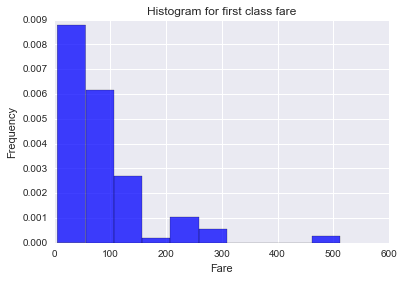

the mean fare for first class is: 86.149
the max fare for first class is: 512.329
the min fare for first class is: 5.000


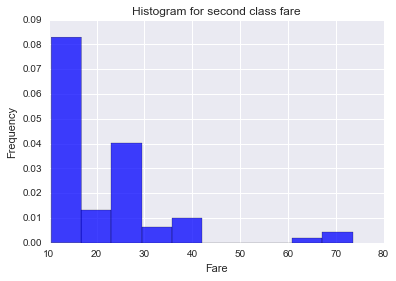

the mean fare for second class is: 21.359
the max fare for second class is: 73.500
the min fare for second class is: 10.500


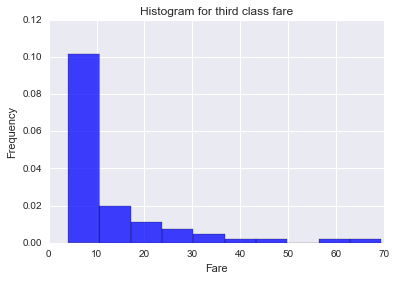

the mean fare for third class is: 13.788
the max fare for third class is: 69.550
the min fare for third class is: 4.013


In [118]:
classes = ['first class', 'second class', 'third class']
pclass =1


for element in classes:
    
    #split the data into single class
    class_fare = grouped_data.get_group(pclass)
    array = np.array(class_fare['Fare'])
    class_fare_np = array[np.where(array > 0)]
    pclass +=1

    #plot the histogram for each class
    plt.hist(class_fare_np, 10, normed=1, facecolor='b', alpha=0.75)
    plt.xlabel("Fare")
    plt.ylabel("Frequency")
    plt.title("Histogram for " + element +" fare")
    plt.show()
    
    #print the descriptive statistic data
    print 'the mean fare for %s is: %.3f' % (element, class_fare_np.mean())
    print 'the max fare for %s is: %.3f' % (element, class_fare_np.max())
    print 'the min fare for %s is: %.3f' % (element, class_fare_np.min())



#### Conclusion :From the histograms and the statistic data, we can figure out that higher class shows higher average fare. However, from the maximum and minmum data of three classes, some people in lower class absolutely paid higher fare for ticket.

# Question2: What factor made people more likely to survive?

##  1. Explore the relationship of class and survial rate.

In [119]:
# select the columns of interest
Pclass_survival = df[['Pclass', 'Survived']]
Pclass_survival[:5]

,Pclass,Survived
0,3,0
1,1,1
2,3,1
3,1,1
4,3,0


### 1.1 Calculate the survival rate for each class and present in table.

In [120]:
grouped_survival = Pclass_survival.groupby('Pclass')

#calculate the total people for each class
total_people_groupby_Pclass = grouped_survival['Survived'].count().reset_index()
total_people_groupby_Pclass.rename(columns = {'Survived':'Total_people'}, inplace = True)

#calculate the total survival for each class
total_survival_groupby_Pclass = grouped_survival['Survived'].sum().reset_index()
total_survival_groupby_Pclass.rename(columns = {'Survived':'Total_survival'}, inplace = True)

#merge two tables above and calculate the survival rate
table = pd.merge(total_people_groupby_Pclass,total_survival_groupby_Pclass, on='Pclass')
table['Survival_rate'] = table['Total_survival']/table['Total_people']
table


,Pclass,Total_people,Total_survival,Survival_rate
0,1,216,136,0.629630
1,2,184,87,0.472826
2,3,491,119,0.242363


#### From the table above, we can tell the higher class shows higher survival rate.

### 1.2 Plot the survival rate vs. class

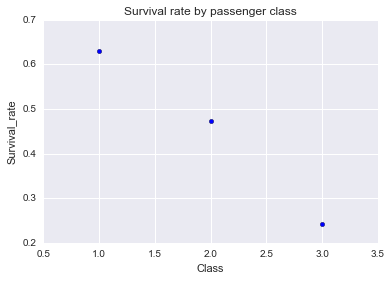

In [121]:
plt.scatter(x=table['Pclass'], y=table['Survival_rate'])
plt.plot(x=table['Pclass'], y=table['Survival_rate'])
plt.xlabel("Class")
plt.ylabel("Survival_rate")
plt.title("Survival rate by passenger class")
plt.show()

#### The figure clearly shows that lower class related to lower survival rate, which is consistant with the conclusion drawn by the table.



## 2. Explore the relationship of survival rate, class and gender.

In [123]:
# select the columns of interest
Pclass_survived_gender = df[['Pclass', 'Survived', 'Sex']]
Pclass_survived_gender.head()

,Pclass,Survived,Sex
0,3,0,male
1,1,1,female
2,3,1,female
3,1,1,female
4,3,0,male


### 2.1 Calculate the survival rate for that grouped by class and gender and present in table.

In [124]:
grouped_survival = Pclass_survived_gender.groupby(['Pclass','Sex'])

#calculate the total people for each group
total_people = grouped_survival['Survived'].count().reset_index()
total_people.rename(columns = {'Survived':'Total_people'}, inplace = True)
total_people['index'] = total_people.index.values

#calculate the total survival for each group
total_survival = grouped_survival['Survived'].sum().reset_index()
total_survival.rename(columns = {'Survived':'Total_survival'}, inplace = True)
total_survival['index'] = total_survival.index.values

#merge the two table above and calculate the survival rate for each group
table_with_gender = pd.merge(total_people, total_survival, on='index')
table_with_gender['Survival_rate'] = table_with_gender['Total_survival']/table_with_gender['Total_people']
table_with_gender

,Pclass_x,Sex_x,Total_people,index,Pclass_y,Sex_y,Total_survival,Survival_rate
0,1,female,94,0,1,female,91,0.968085
1,1,male,122,1,1,male,45,0.368852
2,2,female,76,2,2,female,70,0.921053
3,2,male,108,3,2,male,17,0.157407
4,3,female,144,4,3,female,72,0.500000
5,3,male,347,5,3,male,47,0.135447


#### From the table above, we can tell that the female passenger in first class have highest rate of survive. And female have higher survival rate than male passenger within each class. For clarity, I will plot these data out.

In [125]:
# split data into female part and male part
female_table = table_with_gender.loc[[0, 2, 4 ], :]
female_rate = female_table[['Pclass_x','Survival_rate']]

male_table = table_with_gender.loc[[1, 3, 5 ], :]
male_rate = male_table[['Pclass_x','Survival_rate']]


### 2.2 Plot the survival rate vs. class and colored by gender

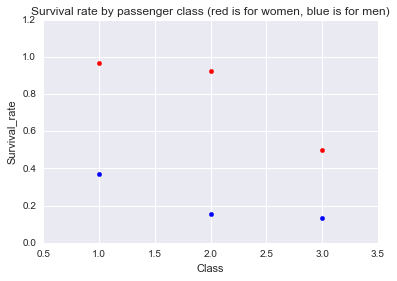

In [126]:
plt.scatter(x=female_rate['Pclass_x'], y=female_rate['Survival_rate'], color = 'r', label = 'female')
plt.scatter(x=male_rate['Pclass_x'], y=male_rate['Survival_rate'], color = 'b', label = 'male')
plt.xlabel("Class")
plt.ylabel("Survival_rate")
plt.title("Survival rate by passenger class (red is for women, blue is for men)")
plt.show()

#### From the figure above, it is clearly shows that female passenger have higher survival rate than male passenger within each class.  And the higher class people have higher survival rate than lower class people.
#### I would say that the male passenger on Titanic are deserved to be called gentlemen.

#### Limitation of the analysis:
#### 1. The dataset is filled with 12 missing values for variable Fare. I deleted these items in order to do some statistical analysis. However, my dataset got smaller for all the variables which might miss some important data points.
#### 2. This dataset is not include all the passengers in titanic ship, but only 891 of them. The dataset with missing data may result in misguiding conclusion.
#### 3. The variables included in this dataset is limited. Some other features like personality, social level which may impact the survival rates are not included in this dataset.
#### 4. Although, from the figure, I got the conclusion that female passenger have higher survival rate than male passenger within each class.  And the higher class people have higher survival rate than lower class people. However, correlation does not imply causation. A female passenger with higher class does not cause the high survival rate. There is no control experiment to prove this causation.

